### Importing Libraries

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn import datasets
import seaborn as sns
import pandas as pd
from tqdm import tqdm
import random
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from scipy.spatial import distance_matrix
from scipy.stats import multivariate_normal

### Dataset
- Here we used an iris dataset. The size of the dataset is $150\times4$. The data was importedd from sklearn dataset where the data was stored as a dictionary with multiple keys. like -['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module].
- Here for implementation, we used only two keys: ' data' and  'target'. Where the dimension of data is $150\times 4$ and target dimension is $150\times1$. The target array has three classes for prediction.
- Then we shuffle both data and target maining their order. After that we split the data into two parts: training data with dimension $100\times4$ and test data with dimension $50\times4$.

In [4]:
iris = datasets.load_iris()

In [5]:
type(iris)

sklearn.utils._bunch.Bunch

In [6]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [7]:
data=iris["data"]

In [8]:
target=iris["target"]

In [9]:
data.shape

(150, 4)

In [10]:
type(data)

numpy.ndarray

In [11]:
data[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [12]:
target.shape

(150,)

In [13]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [14]:
np.random.seed(42)
shuffle=np.random.permutation(150)
data=data[shuffle]
target=target[shuffle]

In [15]:
data[:10]

array([[6.1, 2.8, 4.7, 1.2],
       [5.7, 3.8, 1.7, 0.3],
       [7.7, 2.6, 6.9, 2.3],
       [6. , 2.9, 4.5, 1.5],
       [6.8, 2.8, 4.8, 1.4],
       [5.4, 3.4, 1.5, 0.4],
       [5.6, 2.9, 3.6, 1.3],
       [6.9, 3.1, 5.1, 2.3],
       [6.2, 2.2, 4.5, 1.5],
       [5.8, 2.7, 3.9, 1.2]])

In [16]:
target

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 2, 2, 1, 2, 1, 2, 1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0,
       1, 2, 0, 1, 2, 0, 2, 2, 1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 1, 0, 2, 0,
       0, 1, 1, 2, 1, 2, 2, 1, 0, 0, 2, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1,
       1, 2, 1, 2, 0, 2, 1, 2, 1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2,
       0, 2, 0, 1, 2, 2, 1, 2, 1, 1, 2, 2, 0, 1, 2, 0, 1, 2])

In [17]:
data_train=data[:100]

In [18]:
data_train.shape

(100, 4)

In [19]:
data_test=data[100:]

In [20]:
data_test.shape

(50, 4)

In [21]:
target_train=target[:100]

In [22]:
target_test=target[100:]

### Kernel Density Function
At this point we designed our kernel function. We used multidimensional gaussian like $4$-dimensional Gaussian Kernel function which is expressed mathematically as: 
$$
K(x) = {2\pi}^{-\frac{d}{2}} {det(H)}^{-\frac{1}{2}} e^{-\frac{1}{2} {x^T} {H^{-1}}x}
$$
where $d$ can be a size of train data, column in multi-dimensional case and $H$ is an identitiy mstrix of dimension $4$. We calculate the Kernel density at some point $x$ using the formula:
$$
f(x) = {\frac{1}{n}}{\sum_{i=1}^{n}K(x-x_{i})}
$$
Where $x_{i}$ denotes the $i$-th data point of the training data which is used to calculate the density at point any point $x$. We can put each test data as an argument to this function to obtain densities at the test data points. Note that in the multi-dimensional case $x$ and $x_i$ are both vectors of dimension $4$. In general if we are dealing with an $n$-dimentional data, then $x$ and $x_i$ would be vectors of dimnesion $n$ and the bandwidth or covariance matrix $H$ has to be of dimension $n\times n$.

In [24]:
def k(H, x, d):
    H_inv=np.linalg.inv(H)
    xt=np.matrix.transpose(x)
    y_1=np.matmul(xt,H_inv)
    y=np.matmul(y_1,x)
    exponent=np.exp(-0.5*y)
    t_1=1/np.sqrt(np.linalg.det(H))
    t_2=(2*np.pi)**(-d/2)
    t=t_1*t_2*exponent
    return t

In [25]:
def density_gen(data_test, data_train):
    density_list=[]
    for j in range(len(data_test)):
        s=0
        for i in range(len(data_train)):
            xi=data_train[i]
            dif=data_test[j]-xi 
            s=s+k(np.identity(data_train.shape[1]), dif, data_train.shape[1])
        density_list.append(s/len(data_train))
    return np.array(density_list)

In [26]:
density_list=density_gen(data_test,data_train)

In [27]:
density_list.shape

(50,)

### Classification
 - We have three target values in our data. We partitioned our training data as per these target values or classes.
 - We used the three class-wise partitions of the training data to claculate three separate density distribitions for each test data point.
 - For each test data point we identify the density distribution of the target class for which that test data point exhibits maximum density value.
 - The identified target class is predicted as the target of that test data point
 - We than compare the predicted taget value with the original target values to observe that our model produces an accuracy of $92$ percent.

In [29]:
def get_class_data(class_index,data,target):
    class_data=[]
    for i in range(len(target)):
        if target[i]==class_index:
            class_data.append(data[i])
    return np.array(class_data)

In [30]:
class0_data_train=get_class_data(0,data_train,target_train)

In [31]:
class1_data_train=get_class_data(1,data_train,target_train)

In [32]:
class2_data_train=get_class_data(2,data_train,target_train)

In [33]:
class_0_density_list=density_gen(data_test,class0_data_train)

In [34]:
class_1_density_list=density_gen(data_test,class1_data_train)

In [35]:
class_2_density_list=density_gen(data_test,class2_data_train)

In [36]:
class_0_density_list[25]

0.0003690785932502478

In [37]:
class_1_density_list[25]

0.017838473830496422

In [38]:
class_2_density_list[25]

0.005764137208793522

In [39]:
target_test[25]

1

In [40]:
predicted_classes=[]
for i in range(len(data_test)):
    predicted_class=np.argmax(np.array([class_0_density_list[i],class_1_density_list[i],class_2_density_list[i]]))
    predicted_classes.append(predicted_class)

In [41]:
np.sum(np.array(predicted_classes)==target_test)/len(target_test)

0.92

### Data Standardization
- Here we standardize our data for removing the mean and scaling to unit variance.

In [48]:
# Standardization
scaler = StandardScaler()

In [50]:
scaler.fit(data)

StandardScaler()

In [52]:
scaled_data = scaler.transform(data)

In [54]:
np.std(scaled_data[:,2])

0.9999999999999998

In [56]:
np.std(data[:,2])

1.759404065775303

In [58]:
np.mean(data[:,2])

3.7579999999999996

In [60]:
np.mean(scaled_data[:,2])

-2.6053233644537007e-16

### Dimensionality Reduction : Principal Component Analysis
- Here with help of pca algorithm we reduce the dimension of data $150\times 4$  to  $150\times 2$ and it gives the high varince of the data.
- we then split the iris dataset into training data with dimension $100\times 2$ and test data with dimension $50\times 2$.
- After that we visualize the pca plot for the training data.


In [63]:
## PCS algorithm
from sklearn.decomposition import PCA

In [65]:
pca = PCA(n_components =2)

In [67]:
data_pca=pca.fit_transform(scaled_data)

In [69]:
data_pca.shape

(150, 2)

In [71]:
data_pca_train=data_pca[:100]
data_pca_test=data_pca[100:]

In [73]:
pca.explained_variance_

array([2.93808505, 0.9201649 ])

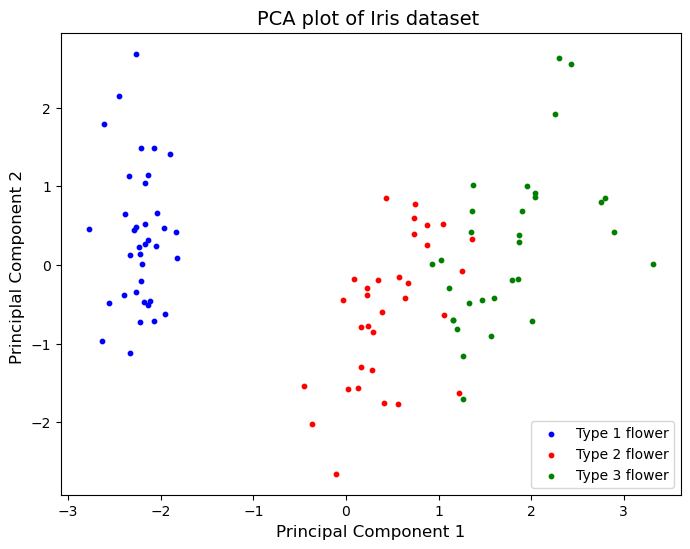

In [75]:
plt.figure(figsize=(8,6))
color_list=["b","r","g"]
legend_list=["Type 1 flower", "Type 2 flower", "Type 3 flower"]
for i in range(len(np.unique(target_train))):
    plt.scatter(data_pca_train[:,0][np.where(target_train==i)],data_pca_train[:,1][np.where(target_train==i)], s=10, c=color_list[i])
plt.legend(legend_list, fontsize=10, loc='lower right')
plt.xlabel("Principal Component 1",fontsize=12)
plt.ylabel("Principlal Component 2 ",fontsize=12)
plt.title("PCA plot of Iris dataset ",fontsize=14)
plt.savefig("iris_pca.png", dpi=600)

### Meshgrid
- Here we create a meshgrid with size of $100\times 100$
- We extend the mesh-grid range by finding a max and min of first colunm and second colunm to add a padding to the mesh-grid

In [78]:
x1_max=np.max(data_pca[:,0])+1
x1_min=np.min(data_pca[:,0])-1

x2_max=np.max(data_pca[:,1])+1
x2_min=np.min(data_pca[:,1])-1

resolution=100
x1_range = np.linspace(start=x1_min, 
                           stop=x1_max, num=resolution)
x2_range = np.linspace(start=x2_min, 
                           stop=x2_max, num=resolution)

X1_grid, X2_grid = np.meshgrid(x1_range, x2_range)

In [80]:
X2_grid.shape

(100, 100)

In [82]:
X1_grid.shape

(100, 100)

### Kernel Density Function
At this point we designed our kernel function. We used $2$-dimensional Gaussian Kernel function which is expressed mathematically as: 
$$
K(x) = {2\pi}^{-\frac{d}{2}} {det(H)}^{-\frac{1}{2}} e^{-\frac{1}{2} {x^T} {H^{-1}}x}
$$
where $d = 2$ in $2$-dimensional case. We calculate the Kernel density at some point x using the formula:
$$
f(x) = {\frac{1}{n}}{\sum_{i=1}^{n}K(x-x_{i})}
$$
Where $x_{i}$ denotes the $i$-th data point of the training data which is used to calculate the density at point any point $x$. We can put each test data as an argument to this function to obtain densities at the test data points. Note that in the $2$-dimensional case $x$ and $x_i$ are both vectors of dimension $2$. In general $x$ and $x_i$ would be vectors of dimnesion $2$ and the bandwidth or covariance matrix $H$ has to be of dimension $100\times 100$.

In [85]:
def k_pca(x,H,d=2):
    H_inv=np.linalg.inv(H)
    xt=np.matrix.transpose(x)
    y_1=np.matmul(xt,H_inv)
    y=np.matmul(y_1,x)
    exponent=np.exp(-0.5*y)
    t_1=1/np.sqrt(np.linalg.det(H))
    t_2=(2*np.pi)**(-d/2)
    t=t_1*t_2*exponent
    return t

In [87]:
def density_gen_pca(X1_grid, X2_grid, data_pca):
    density_list=[]
    for r in range(len(X1_grid[0])):
        for c in range (len(X1_grid[1])):
            s=0
            for i in range(len(data_pca)):
                xi=data_pca[i]
                dif=np.array([X1_grid[r][c],X2_grid[r][c]])-xi 
                s=s+k_pca(dif,np.array([[1, 0],[0, 1]]))
            density_list.append(s/len(data_pca))
    return np.reshape(np.array(density_list), X1_grid.shape)

In [89]:
density_list.shape

(50,)

In [91]:
X1_grid.shape

(100, 100)

In [93]:
grid_density_train_pca=density_gen_pca(X1_grid, X2_grid, data_pca)

In [95]:
 grid_density_train_pca.shape

(100, 100)

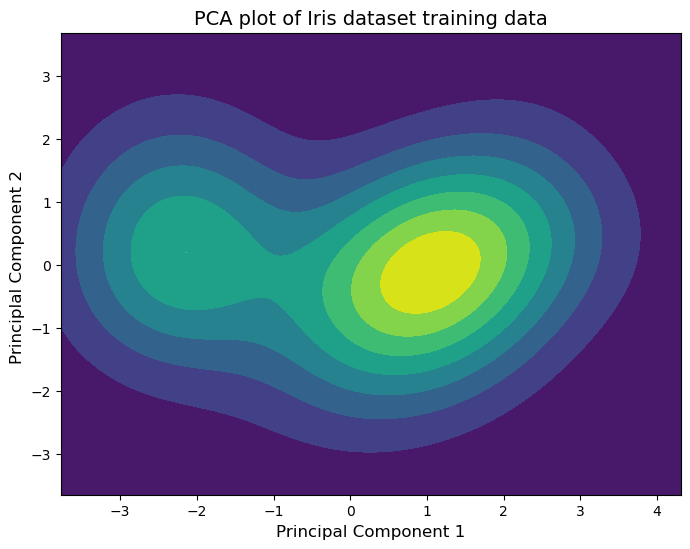

In [97]:
plt.figure(figsize=(8,6))
CS = plt.contourf(X1_grid, X2_grid, grid_density_train_pca)
plt.xlabel("Principal Component 1",fontsize=12)
plt.ylabel("Principlal Component 2 ",fontsize=12)
plt.title("PCA plot of Iris dataset training data",fontsize=14)
plt.savefig("iris_pca.png", dpi=600)

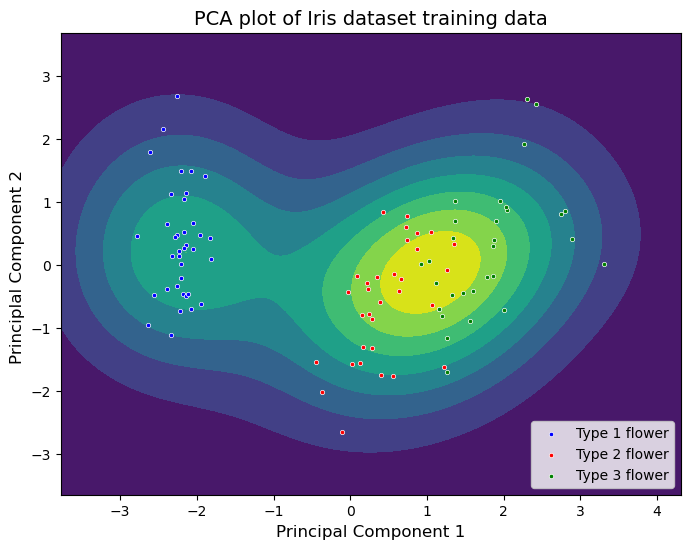

In [99]:
plt.figure(figsize=(8,6))
CS = plt.contourf(X1_grid, X2_grid, grid_density_train_pca)
color_list=["b","r","g"]
legend_list=["Type 1 flower", "Type 2 flower", "Type 3 flower"]
for i in range(len(np.unique(target_train))):
    plt.scatter(data_pca_train[:,0][np.where(target_train==i)],data_pca_train[:,1][np.where(target_train==i)], s=10, c=color_list[i], edgecolors= "white", linewidth=0.5)
plt.legend(legend_list, fontsize=10, loc='lower right')
plt.xlabel("Principal Component 1",fontsize=12)
plt.ylabel("Principlal Component 2 ",fontsize=12)
plt.title("PCA plot of Iris dataset training data",fontsize=14)
plt.savefig("iris_pca.png", dpi=600)

### Class-wise Density Calculation
 - We have three target values in our data. We partitioned our training data as per these target values or classes.
 - We used the three class-wise partitions of the training data to claculate three separate density distribitions for each test data point.
 - For each test data point we identify the density distribution of the target class for which that test data point exhibits maximum density value.
 - After that we visualize the training data which is majority class and test data which is minority class with help of counter plot.

In [102]:
def get_class_data_pca(class_index,data_pca_train,target_train):
    class_data_pca=[]
    for i in range(len(target_train)):
        if target[i]==class_index:
            class_data_pca.append(data_pca_train[i])
    return np.array(class_data_pca)

In [104]:
class0_data_train_pca = get_class_data_pca(0,data_pca_train,target_train)

In [106]:
class0_data_train_pca.shape

(37, 2)

In [108]:
data_pca_train.shape

(100, 2)

In [110]:
data_pca.shape

(150, 2)

In [112]:
class1_data_train_pca=get_class_data_pca(1,data_pca_train,target_train)

In [114]:
class2_data_train_pca=get_class_data_pca(2,data_pca_train,target_train)

In [116]:
class_0_density_list=density_gen_pca(X1_grid, X2_grid, class0_data_train_pca)

In [118]:
class_1_density_list=density_gen_pca(X1_grid, X2_grid, class1_data_train_pca)

In [120]:
class_2_density_list=density_gen_pca(X1_grid, X2_grid, class2_data_train_pca)

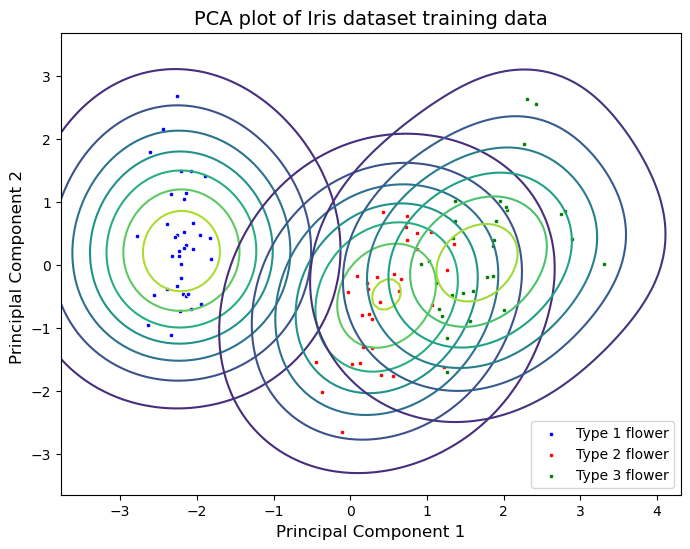

In [122]:
plt.figure(figsize=(8,6))
CS0 = plt.contour(X1_grid, X2_grid, class_0_density_list)
CS1 = plt.contour(X1_grid, X2_grid, class_1_density_list)
CS2 = plt.contour(X1_grid, X2_grid, class_2_density_list)
color_list=["b","r","g"]
legend_list=["Type 1 flower", "Type 2 flower", "Type 3 flower"]
for i in range(len(np.unique(target_train))):
    plt.scatter(data_pca_train[:,0][np.where(target_train==i)],data_pca_train[:,1][np.where(target_train==i)], s=10, c=color_list[i], edgecolors= "white", linewidth=0.5)
plt.legend(legend_list, fontsize=10, loc='lower right')
plt.xlabel("Principal Component 1",fontsize=12)
plt.ylabel("Principlal Component 2 ",fontsize=12)
plt.title("PCA plot of Iris dataset training data",fontsize=14)
plt.savefig("iris_pca.png", dpi=600)

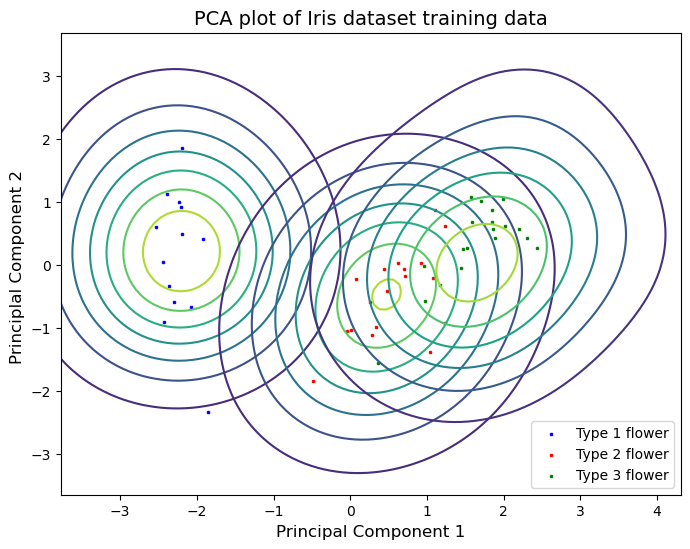

In [124]:
plt.figure(figsize=(8,6))
CS0 = plt.contour(X1_grid, X2_grid, class_0_density_list)
CS1 = plt.contour(X1_grid, X2_grid, class_1_density_list)
CS2 = plt.contour(X1_grid, X2_grid, class_2_density_list)
color_list=["b","r","g"]
legend_list=["Type 1 flower", "Type 2 flower", "Type 3 flower"]
for i in range(len(np.unique(target_train))):
    plt.scatter(data_pca_test[:,0][np.where(target_test==i)],data_pca_test[:,1][np.where(target_test==i)], s=10, c=color_list[i], edgecolors= "white", linewidth=0.5)
plt.legend(legend_list, fontsize=10, loc='lower right')
plt.xlabel("Principal Component 1",fontsize=12)
plt.ylabel("Principlal Component 2 ",fontsize=12)
plt.title("PCA plot of Iris dataset training data",fontsize=14)
plt.savefig("iris_pca.png", dpi=600)

## Metropolis Hastings: Sampling from KDE

- In this technique first we have to take a

In [127]:
def metropolis_hastings(target_density, data_train, size=100):
    np.random.seed(43)
    burnin_size = 5000
    size += burnin_size
    x0 =np.array([np.zeros(data_train.shape[1])])
    xt = x0
    samples = []
    for i in tqdm(range(size)):
        xt_candidate = np.array([np.random.multivariate_normal(xt[0], 0.2*np.eye(data_train.shape[1]))])
        accept_prob = (target_density(xt_candidate,data_train))/(target_density(xt,data_train))
        if np.random.uniform(0, 1) < accept_prob:
            xt = xt_candidate
        samples.append(xt)
    samples = np.array(samples[burnin_size:])
    samples = np.reshape(samples, [samples.shape[0], 4])
    return samples

In [129]:
samples=metropolis_hastings(density_gen, data_train, size=150)

100%|██████████| 5150/5150 [00:16<00:00, 315.29it/s]


In [131]:
len(samples)

150

In [133]:
samples.shape

(150, 4)

In [135]:
scaler.fit(samples)
scale_samples = scaler.transform(samples)
pca = PCA(n_components =2)
samples_pca = pca.fit_transform(scale_samples)
samples_pca.shape

(150, 2)

Text(0.5, 1.0, 'PCA plot of senthetic data')

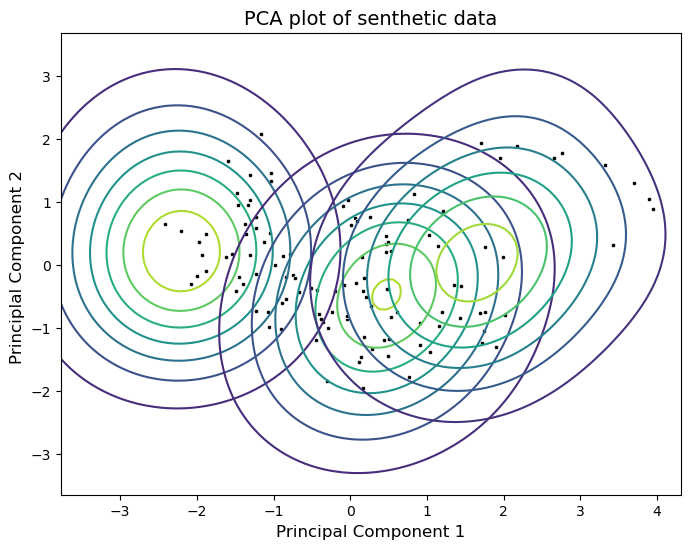

In [137]:
plt.figure(figsize=(8,6))
CS0 = plt.contour(X1_grid, X2_grid, class_0_density_list)
CS1 = plt.contour(X1_grid, X2_grid, class_1_density_list)
CS2 = plt.contour(X1_grid, X2_grid, class_2_density_list)

plt.scatter(samples_pca[:,0],samples_pca[:,1], s=10, c="k", edgecolors= "white", linewidth=0.5)

#for i in range(len(np.unique(target_train))):
#    plt.scatter(data_pca_test[:,0][np.where(target_test==i)],data_pca_test[:,1][np.where(target_test==i)], s=10, c=color_list[i], edgecolors= "white", linewidth=0.5)
    
plt.xlabel("Principal Component 1",fontsize=12)
plt.ylabel("Principlal Component 2 ",fontsize=12)
plt.title("PCA plot of senthetic data",fontsize=14)

Text(0.5, 1.0, 'PCA plot of senthetic data')

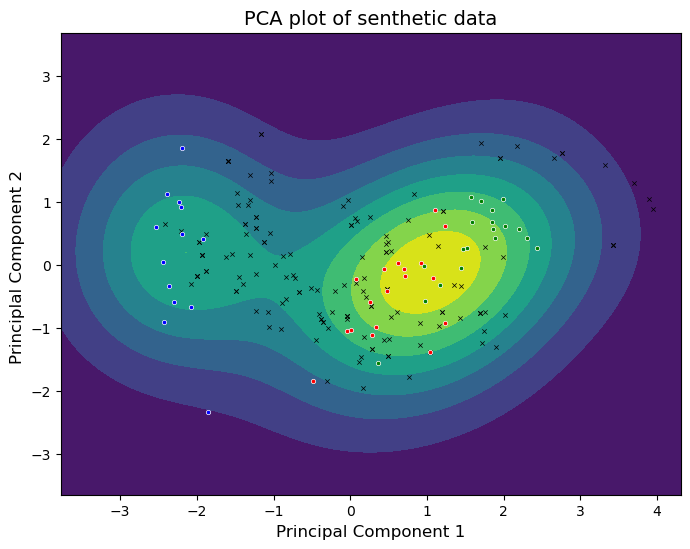

In [139]:
plt.figure(figsize=(8,6))
CS = plt.contourf(X1_grid, X2_grid, grid_density_train_pca)
plt.scatter(samples_pca[:,0],samples_pca[:,1], s=10, c="k", marker="x", linewidth=0.5)

for i in range(len(np.unique(target_train))):
    plt.scatter(data_pca_test[:,0][np.where(target_test==i)],data_pca_test[:,1][np.where(target_test==i)], s=10, c=color_list[i], edgecolors= "white", linewidth=0.5)
    
plt.xlabel("Principal Component 1",fontsize=12)
plt.ylabel("Principlal Component 2 ",fontsize=12)
plt.title("PCA plot of senthetic data",fontsize=14)

## Metropolis Hastings: Sampling from class wise KDE
- Choose random initialization for xt
- Sample from class wise KDE

In [142]:
samples_class_wise=[]
for i in range(len(np.unique(target_train))):
    samples_class=metropolis_hastings(density_gen, data_train[np.where(target_train==i)], size=50)
    samples_class_wise.append(samples_class)
samples_class_wise=np.concatenate(samples_class_wise)

100%|██████████| 5050/5050 [00:05<00:00, 980.22it/s] 


In [144]:
samples_class_wise.shape

(150, 4)

In [146]:
scaler.fit(samples_class_wise)
scale_samples_class_wise = scaler.transform(samples_class_wise)
samples_pca_class_wise = pca.fit_transform(scale_samples_class_wise)
samples_pca_class_wise.shape

(150, 2)

Text(0.5, 1.0, 'PCA plot of senthetic data')

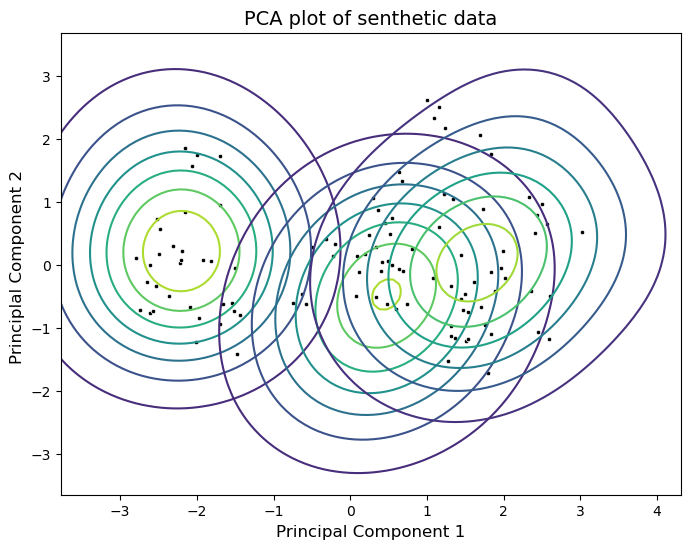

In [148]:
plt.figure(figsize=(8,6))
CS0 = plt.contour(X1_grid, X2_grid, class_0_density_list)
CS1 = plt.contour(X1_grid, X2_grid, class_1_density_list)
CS2 = plt.contour(X1_grid, X2_grid, class_2_density_list)

plt.scatter(samples_pca_class_wise[:,0],samples_pca_class_wise[:,1], s=10, c="k", edgecolors= "white", linewidth=0.5)

#for i in range(len(np.unique(target_train))):
#    plt.scatter(data_pca_test[:,0][np.where(target_test==i)],data_pca_test[:,1][np.where(target_test==i)], s=10, c=color_list[i], edgecolors= "white", linewidth=0.5)
    
plt.xlabel("Principal Component 1",fontsize=12)
plt.ylabel("Principlal Component 2 ",fontsize=12)
plt.title("PCA plot of senthetic data",fontsize=14)

Text(0.5, 1.0, 'PCA plot of senthetic data')

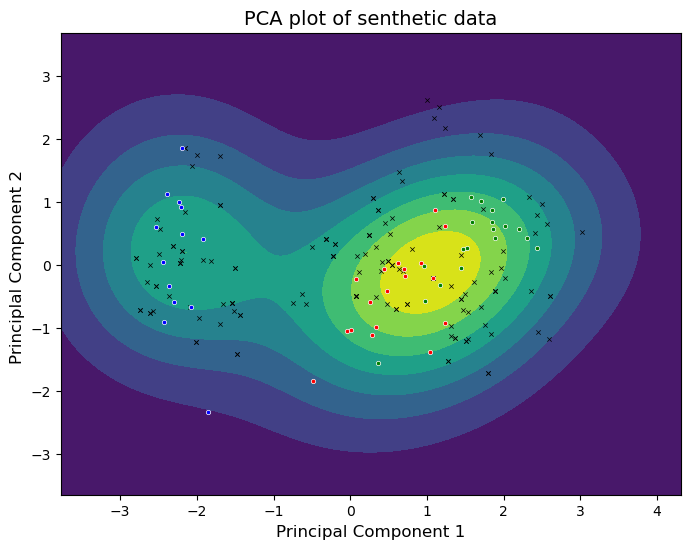

In [150]:
plt.figure(figsize=(8,6))
CS = plt.contourf(X1_grid, X2_grid, grid_density_train_pca)

plt.scatter(samples_pca_class_wise[:,0],samples_pca_class_wise[:,1], s=10, c="k", marker="x", linewidth=0.5)

for i in range(len(np.unique(target_train))):
    plt.scatter(data_pca_test[:,0][np.where(target_test==i)],data_pca_test[:,1][np.where(target_test==i)], s=10, c=color_list[i], edgecolors= "white", linewidth=0.5)
    
plt.xlabel("Principal Component 1",fontsize=12)
plt.ylabel("Principlal Component 2 ",fontsize=12)
plt.title("PCA plot of senthetic data",fontsize=14)